## Goals of Today's Lab:

1. A brief recap of hypothesis testing
2. Parametric hypothesis testing
3. Non-parametric hypothesis testing

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Components of a Hypothesis Test

They are: 

- Hypothesis
    - Alternative
    - Null
    
-  Test Statistic
    - Parameters
    
- Levels of Significance
    - 
-
-
  
$\dots$




**Which of these are valid null hypotheses:**

1. $H_0: \bar{X} = 0$  
   $H_A: \bar{X} \neq 0$

2. $H_0: \mu \leq 34$  
   $H_A: \mu > 34$
   
3. $H_0: \text{The mean girth of all Redwood Trees in California} = 225 in.$  
   $H_A: \text{The mean girth of all Redwood Trees in California} < 225 in.$
   
4. $H_0: \sigma_1 = \sigma_2$  
   $H_A: \sigma_1 \neq \sigma_2$
   
5. $H_0: \text{The sample standard deviation of 2018 SAT test scores} = 50$  
   $H_A: \text{The sample standard deviation of 2018 SAT test scores} > 50$   

    Answer: Top and bottom - you cannot state hypothesis on sample data


### Relating Hypotheses to Errors


#### Why is it necessary for the Null Hypothesis to be the hypothesis of no difference?

- It represents the "status-quo" 
    - A new drug for a disease 
- It represents a relevant baseline value
    - A new feed that claims to increase cattle weight by 20 lb on average
- It represents a value generally true unless proven otherwise
    - A person on trial - innocent until proven guilty
    
    
#### How does this translate into Type-I and Type-II errors?

Because depending on our hypothesis, our consideration for these errors increases.  
It is incrediby hard to control for both errors at the same time; as one decreases, the other increases.

This the reason why Type-I error is more serious.  
By rejecting the status-quo, we are considering very serious change.

<img src="img/testing_error.png" width="550">





## BUT WHY DO WE CARE SO MUCH ABOUT HYPOTHESIS TESTS??!

Hypothesis testing is without doubt, one of the universal concepts of statistical data analysis.     
It is central to many statistical methods, including  
- analysis of variance
- regression analysis
- analysis of categorical data, etc.

So...

<img src="img/hypothesis_meme_2.jpg" width="350">

**p-values**

A very low p-value signals incompatibility with the null hypothesis.   
&nbsp;  
When p-values are low, one of two things is true:  
(a) either you have just witnessed a rare chance event, or   
(b) your null hypothesis is false.


## Parametric Tests

- **Z-Tests (Continuous Data)** - For comparing up to two population means, given standard deviation
- **t-Tests** - For comparing up to two population means
- **Chi-Squared Tests** - For comparing categorical variables
- **F-Test** - For comparing multiple populations
- **Z-Test for Proportions** - For comparing population proportions


## Non-Parametric Tests

- **One-Sample Sign Test** - To compare samples for change before and after a treatment 
- **Wilcoxon Signed Rank Test** - To compare samples for change before and after a treatment 
- **The Mann-Kendall Trend Test** - To assess trends in time-series data.
- **Mann-Whitney U Test** - To compare two populations
- **Kruskal-Wallis Test** - To compare more than two independent populations
- **Kolmogorov-Smirnov Test** -To compare probability distributions
- **Runs Test** - To test for randomness

## Shreya's Hypothesis:

<img src="img/ice_cream.jpg" width="450">

As an extremely biased person, I strongly believe that more individuals prefer vanilla ice-cream to chocolate ice-cream.  
Why, you ask?  
Because I don't like chocolate ice-cream so much, while I LOVE vanilla.

So, in order to prove my case, I will conduct a hypothesis test.  

What will the null and alternative hypotheses look like?

$$H_0: \text{The same or fewer amount of people like vanilla over chocolate}$$
$$H_A: \text{More people like vanilla over chocolate}$$


Also, what are my underlying assumptions here?

We will write our hypothesis in parametric form.  
This is for us to be able to define our test statistic.

$$H_0: p(Vanilla) \leq 0.5$$
$$H_A: p(Vanilla) > 0.5$$

This parameter looks a lot like something we've already seen before.  
What distribution does this follow?

Based on this information, how do we compute the test statistic?

$$\text{Test Statistic} = T = \frac{p - \text{0.5}}{S.E.(param)}$$

**Collecting samples:**  
Let's do a quick survey!

We will be using [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) for conducting this test.

In [10]:
from statsmodels.stats.proportion import proportions_ztest

count = 13 
nobs = 15
value = 0.5
alt = 'larger'

In [11]:
stat, pval = proportions_ztest(count, nobs, value, alternative = alt)
print('The p-value is {0:0.4f}'.format(pval))
print('The critical value is {0:0.4f}'.format(stat))

The p-value is 0.0000
The critical value is 4.1775


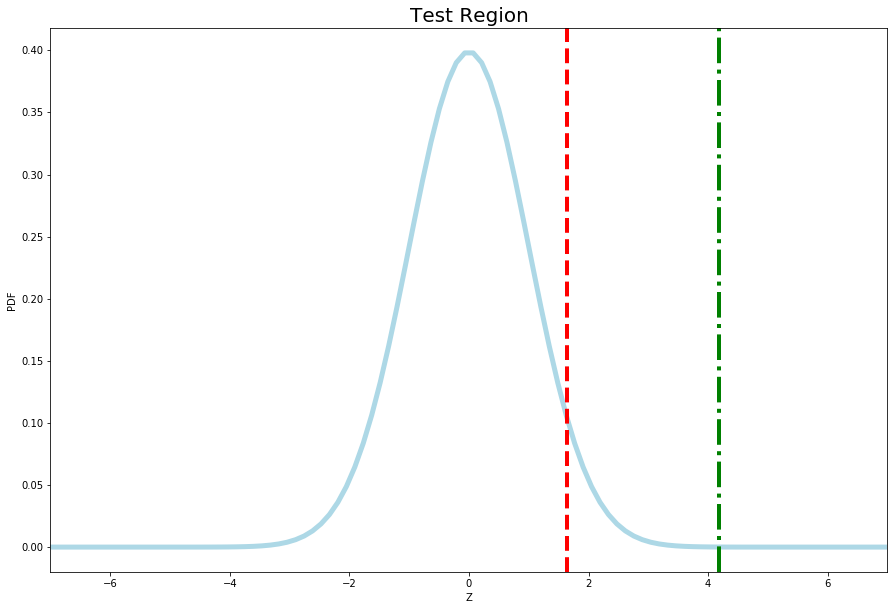

In [12]:
x_min = -7
x_max = 7
mean = 0 
std = 1

x = np.linspace(x_min, x_max, 100)

y = stats.norm.pdf(x,mean,std)
plt.figure(figsize=(15, 10))
plt.plot(x,y, lw = 5, color = 'lightblue')
# plt.grid()
plt.xlim(x_min,x_max)
# plt.ylim(0,0.5)
plt.title('Test Region',fontsize=20)
plt.axvline(x=1.645, color='red', linestyle='dashed', ymax = 1, lw = 4)
plt.axvline(x=stat, color='green', linestyle='dashdot', ymax = 1, lw = 4)
plt.xlabel('Z')
plt.ylabel('PDF')
plt.show()

Based on these results, what is the decision?  

**Decision Rule:**


And what are the conclusions?

**Conclusion:**



## A Non-Parametric Example:

Suppose we want to test whether a random variable follows a particular distribution,  

We will apply the Kolmogorov-Smirnov Test using [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html).

First, let's generate some data:

In [ ]:
from scipy.stats import kstest
np.random.seed(987654321)
normal_vals = stats.norm.rvs(size=100)

In [ ]:
ks_test_1 = kstest(normal_vals, "uniform") # ---> What is the null hypothesis here?
print(ks_test_1) 

In [ ]:
ks_test_2 = kstest(normal_vals, "norm")    
print(ks_test_2) 